In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [20]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models'
CH = 53

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [21]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_2/   figures/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  loss_accuracy/
data_Goose_1st_2/      data_Goose_all_2/      model/
data_Goose_1st_5s_1/   data_Goose_all_5s_2/


In [22]:
len(train_loader), len(val_loader), len(test_loader)

(173, 26, 24)

In [23]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180331, rec:001, time:3074.0, label:1.0
date:180325, rec:007, time:6983.0, label:0.0


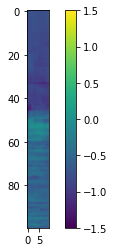

date:180410, rec:005, time:1628.0, label:0.0


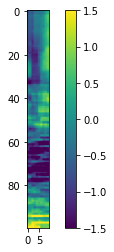

date:180324, rec:008, time:1141.0, label:0.0


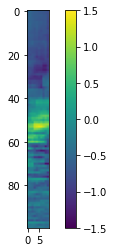

date:180330, rec:004, time:3786.0, label:1.0
date:180331, rec:007, time:4277.0, label:0.0


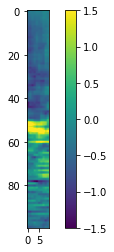

date:180329, rec:002, time:3792.0, label:1.0
date:180324, rec:003, time:2269.0, label:1.0
date:180327, rec:001, time:2100.0, label:0.0


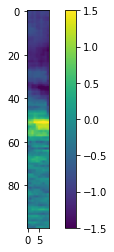

date:180330, rec:009, time:5721.0, label:0.0


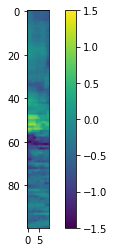

date:180331, rec:007, time:5998.0, label:0.0


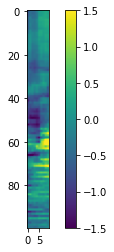

date:180327, rec:008, time:5003.0, label:0.0


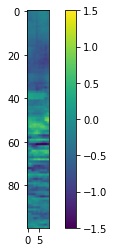

date:180329, rec:001, time:1080.0, label:0.0


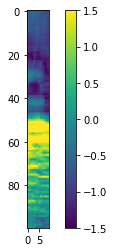

date:180325, rec:003, time:1295.0, label:1.0
date:180327, rec:002, time:4323.0, label:1.0
date:180331, rec:007, time:6458.0, label:0.0


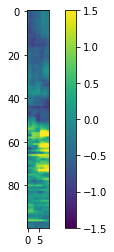

date:180329, rec:004, time:590.0, label:1.0
date:180329, rec:001, time:6271.0, label:1.0
date:180331, rec:003, time:1280.0, label:1.0
date:180325, rec:005, time:6794.0, label:1.0
date:180324, rec:001, time:5869.0, label:1.0
date:180330, rec:009, time:3550.0, label:0.0


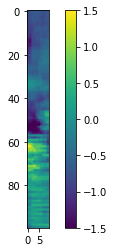

date:180322, rec:003, time:6606.0, label:1.0
date:180322, rec:007, time:3599.0, label:0.0


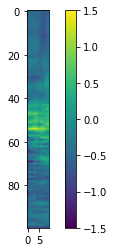

date:180327, rec:007, time:4140.0, label:0.0


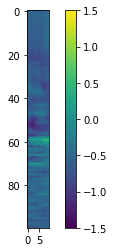

date:180410, rec:006, time:4039.0, label:1.0
date:180330, rec:003, time:5263.0, label:1.0
date:180330, rec:009, time:1176.0, label:1.0
date:180330, rec:001, time:5299.0, label:1.0
date:180327, rec:005, time:5758.0, label:0.0


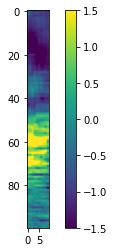

date:180410, rec:003, time:7172.0, label:1.0
date:180410, rec:003, time:3060.0, label:1.0
date:180327, rec:005, time:2600.0, label:1.0
date:180327, rec:008, time:5463.0, label:0.0


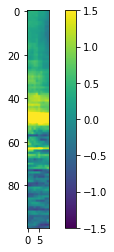

date:180330, rec:009, time:1354.0, label:0.0


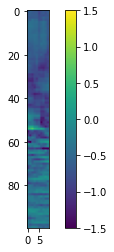

date:180331, rec:005, time:1686.0, label:1.0
date:180322, rec:007, time:4990.0, label:0.0


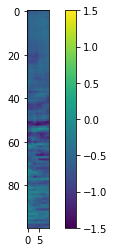

date:180327, rec:007, time:2800.0, label:0.0


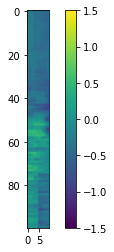

date:180324, rec:006, time:4458.0, label:1.0
date:180331, rec:007, time:2537.0, label:0.0


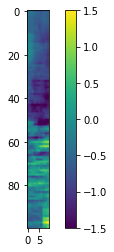

date:180410, rec:002, time:7010.0, label:1.0
date:180327, rec:007, time:4721.0, label:0.0


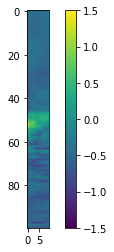

date:180327, rec:001, time:1560.0, label:0.0


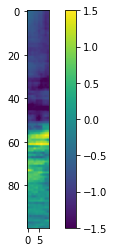

date:180322, rec:007, time:3980.0, label:0.0


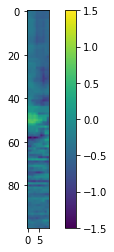

date:180324, rec:001, time:5360.0, label:0.0


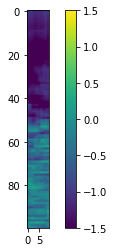

date:180327, rec:001, time:240.0, label:0.0


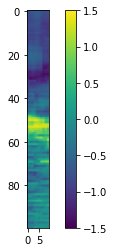

date:180410, rec:004, time:1468.0, label:1.0
date:180329, rec:005, time:1855.0, label:1.0
date:180327, rec:007, time:2030.0, label:0.0


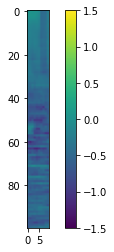

date:180410, rec:006, time:5096.0, label:1.0
date:180322, rec:003, time:1093.0, label:1.0
date:180330, rec:008, time:6795.0, label:0.0


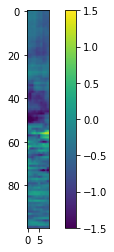

date:180331, rec:001, time:5637.0, label:1.0
date:180410, rec:002, time:3305.0, label:1.0
date:180410, rec:006, time:4199.0, label:1.0
date:180324, rec:004, time:2489.0, label:1.0
date:180325, rec:009, time:5739.0, label:1.0
date:180330, rec:009, time:6071.0, label:0.0


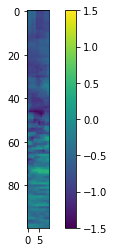

date:180324, rec:004, time:2199.0, label:1.0
date:180331, rec:001, time:1530.0, label:0.0


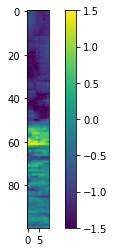

date:180330, rec:008, time:4347.0, label:0.0


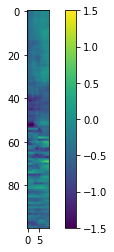

date:180329, rec:003, time:2314.0, label:1.0
date:180325, rec:001, time:1900.0, label:0.0


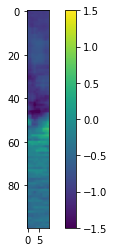

date:180325, rec:007, time:6383.0, label:0.0


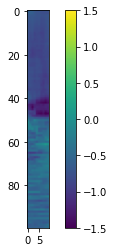

date:180330, rec:008, time:3776.0, label:0.0


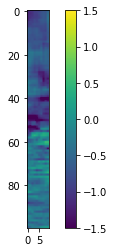

date:180330, rec:008, time:2226.0, label:0.0


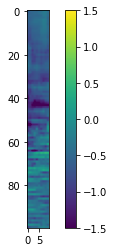

date:180329, rec:004, time:5971.0, label:1.0
date:180331, rec:007, time:5628.0, label:0.0


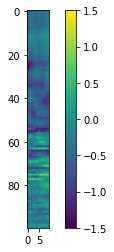

date:180322, rec:003, time:6166.0, label:1.0
date:180324, rec:009, time:460.0, label:0.0


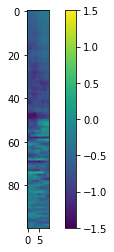

date:180325, rec:003, time:4583.0, label:0.0


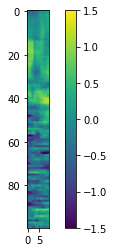

date:180323, rec:007, time:5511.0, label:0.0


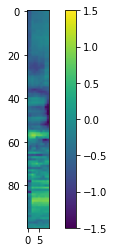

date:180327, rec:008, time:1622.0, label:0.0


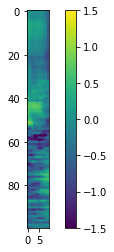

date:180331, rec:007, time:2397.0, label:0.0


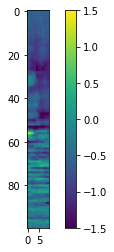

date:180330, rec:001, time:5579.0, label:1.0
date:180329, rec:001, time:3581.0, label:1.0
date:180330, rec:009, time:4391.0, label:0.0


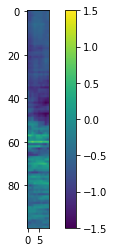

date:180401, rec:001, time:1120.0, label:0.0


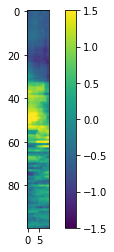

date:180327, rec:008, time:5453.0, label:0.0


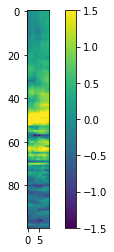

date:180327, rec:005, time:6158.0, label:0.0


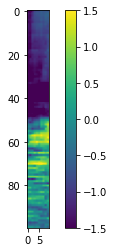

date:180331, rec:007, time:2367.0, label:0.0


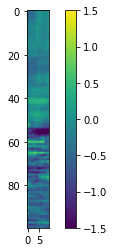

date:180324, rec:008, time:3603.0, label:0.0


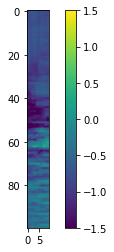

date:180331, rec:001, time:800.0, label:0.0


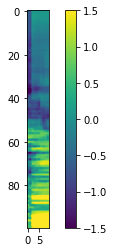

date:180331, rec:003, time:1520.0, label:1.0
date:180410, rec:006, time:6142.0, label:0.0


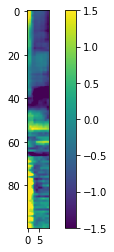

date:180401, rec:001, time:1950.0, label:0.0


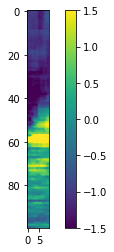

date:180329, rec:002, time:2962.0, label:1.0
date:180325, rec:004, time:1798.0, label:1.0
date:180329, rec:001, time:4741.0, label:1.0
date:180322, rec:005, time:6324.0, label:1.0
date:180325, rec:001, time:930.0, label:0.0


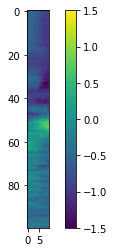

date:180324, rec:004, time:1749.0, label:1.0
date:180327, rec:005, time:6328.0, label:0.0


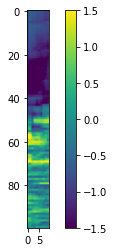

date:180323, rec:003, time:997.0, label:1.0
date:180327, rec:006, time:3907.0, label:1.0
date:180327, rec:008, time:4923.0, label:0.0


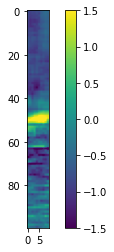

date:180410, rec:004, time:1848.0, label:1.0
date:180327, rec:001, time:1520.0, label:0.0


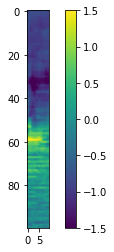

date:180327, rec:007, time:3260.0, label:0.0


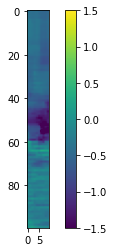

date:180331, rec:004, time:409.0, label:1.0
date:180325, rec:003, time:2655.0, label:1.0
date:180325, rec:009, time:2390.0, label:0.0


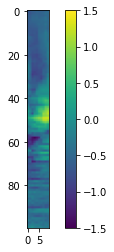

date:180327, rec:007, time:3130.0, label:0.0


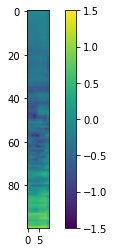

date:180327, rec:007, time:4431.0, label:0.0


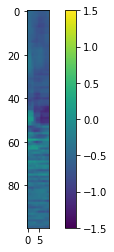

date:180330, rec:008, time:6675.0, label:0.0


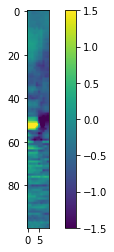

date:180325, rec:006, time:2212.0, label:1.0
date:180327, rec:001, time:460.0, label:0.0


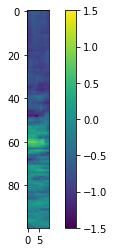

date:180329, rec:002, time:5305.0, label:1.0
date:180325, rec:007, time:800.0, label:1.0
date:180324, rec:005, time:5866.0, label:1.0
date:180325, rec:007, time:6113.0, label:0.0


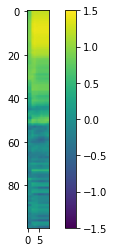

date:180330, rec:008, time:3316.0, label:0.0


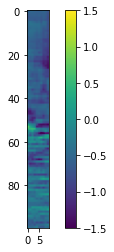

date:180322, rec:007, time:1417.0, label:0.0


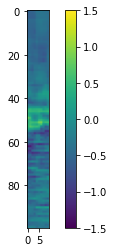

date:180329, rec:001, time:930.0, label:0.0


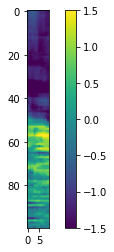

date:180330, rec:009, time:1095.0, label:1.0
date:180325, rec:009, time:4389.0, label:0.0


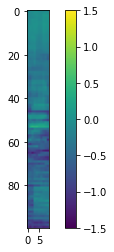

date:180329, rec:004, time:5611.0, label:1.0
date:180330, rec:009, time:4351.0, label:0.0


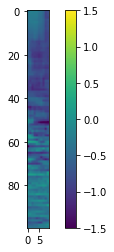

date:180322, rec:003, time:1693.0, label:1.0
date:180327, rec:008, time:1592.0, label:0.0


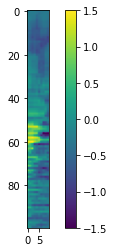

date:180322, rec:007, time:1557.0, label:0.0


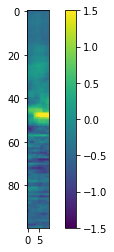

date:180401, rec:001, time:6293.0, label:1.0
date:180329, rec:004, time:3834.0, label:1.0
date:180330, rec:009, time:6141.0, label:0.0


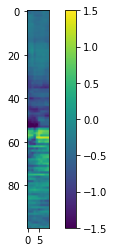

date:180322, rec:003, time:3408.0, label:1.0
date:180327, rec:008, time:3472.0, label:0.0


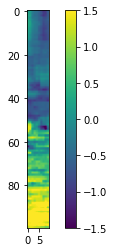

date:180410, rec:006, time:1726.0, label:1.0
date:180329, rec:004, time:30.0, label:1.0


In [24]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [25]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [0]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 10



Train loss for epoch 0: 0.49945250153541565
Val loss for epoch 0: 0.4822631776332855
Train loss for epoch 1: 0.4818629026412964
Val loss for epoch 1: 0.5156475901603699
Train loss for epoch 2: 0.4754927456378937
Val loss for epoch 2: 0.4578326940536499
2
Train loss for epoch 3: 0.47064581513404846
Val loss for epoch 3: 0.45010411739349365
3
Train loss for epoch 4: 0.46729958057403564
Val loss for epoch 4: 0.4774954617023468
Train loss for epoch 5: 0.4665921628475189
Val loss for epoch 5: 0.4439716935157776
5
Train loss for epoch 6: 0.46421581506729126
Val loss for epoch 6: 0.4286557137966156
6
Train loss for epoch 7: 0.4634392559528351
Val loss for epoch 7: 0.4447343349456787
Train loss for epoch 8: 0.46180611848831177
Val loss for epoch 8: 0.3987734615802765
8
Train loss for epoch 9: 0.46159642934799194
Val loss for epoch 9: 0.42983758449554443
Train loss for epoch 10: 0.461543470621109
Val loss for epoch 10: 0.42204031348228455
Train loss for epoch 11: 0.4611124098300934
Val loss for

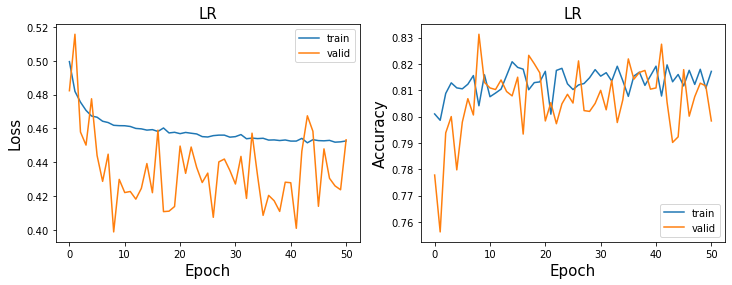

Train loss for epoch 0: 0.49863430857658386
Val loss for epoch 0: 0.48926761746406555
Train loss for epoch 1: 0.4807696044445038
Val loss for epoch 1: 0.47463008761405945
1
Train loss for epoch 2: 0.47480836510658264
Val loss for epoch 2: 0.4778726398944855
Train loss for epoch 3: 0.4702494442462921
Val loss for epoch 3: 0.440171480178833
3
Train loss for epoch 4: 0.4680136442184448
Val loss for epoch 4: 0.45573851466178894
Train loss for epoch 5: 0.4655434489250183
Val loss for epoch 5: 0.4433440566062927
Train loss for epoch 6: 0.46488234400749207
Val loss for epoch 6: 0.48165345191955566
Train loss for epoch 7: 0.46295878291130066
Val loss for epoch 7: 0.4528365731239319
Train loss for epoch 8: 0.46167412400245667
Val loss for epoch 8: 0.42376676201820374
8
Train loss for epoch 9: 0.46077969670295715
Val loss for epoch 9: 0.44704529643058777
Train loss for epoch 10: 0.46204328536987305
Val loss for epoch 10: 0.4172044098377228
10
Train loss for epoch 11: 0.461344450712204
Val loss f

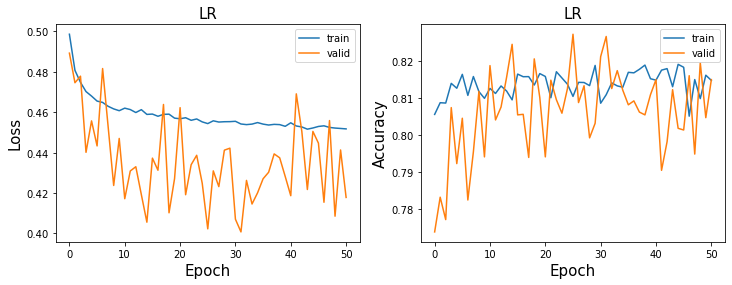

Train loss for epoch 0: 0.49946311116218567
Val loss for epoch 0: 0.5019312500953674
Train loss for epoch 1: 0.4828842878341675
Val loss for epoch 1: 0.4873637557029724
1
Train loss for epoch 2: 0.47606539726257324
Val loss for epoch 2: 0.4696882963180542
2
Train loss for epoch 3: 0.4708796739578247
Val loss for epoch 3: 0.4835365414619446
Train loss for epoch 4: 0.4682197570800781
Val loss for epoch 4: 0.45069828629493713
4
Train loss for epoch 5: 0.4662495255470276
Val loss for epoch 5: 0.4513038396835327
Train loss for epoch 6: 0.46495553851127625
Val loss for epoch 6: 0.4344789683818817
6
Train loss for epoch 7: 0.46351948380470276
Val loss for epoch 7: 0.42345350980758667
7
Train loss for epoch 8: 0.46230238676071167
Val loss for epoch 8: 0.44488435983657837
Train loss for epoch 9: 0.4616774022579193
Val loss for epoch 9: 0.4411167502403259
Train loss for epoch 10: 0.4603833258152008
Val loss for epoch 10: 0.44590845704078674
Train loss for epoch 11: 0.4622621238231659
Val loss fo

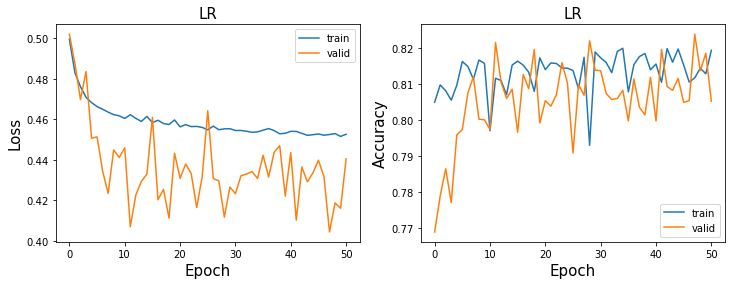

Train loss for epoch 0: 0.5022427439689636
Val loss for epoch 0: 0.4910666346549988
Train loss for epoch 1: 0.48064282536506653
Val loss for epoch 1: 0.47751808166503906
1
Train loss for epoch 2: 0.47394654154777527
Val loss for epoch 2: 0.4986766576766968
Train loss for epoch 3: 0.47156640887260437
Val loss for epoch 3: 0.4354550540447235
3
Train loss for epoch 4: 0.4676492214202881
Val loss for epoch 4: 0.4569886326789856
Train loss for epoch 5: 0.4656272530555725
Val loss for epoch 5: 0.41806134581565857
5
Train loss for epoch 6: 0.465366393327713
Val loss for epoch 6: 0.4687751829624176
Train loss for epoch 7: 0.46413806080818176
Val loss for epoch 7: 0.42717790603637695
Train loss for epoch 8: 0.46230459213256836
Val loss for epoch 8: 0.4497133195400238
Train loss for epoch 9: 0.46306318044662476
Val loss for epoch 9: 0.40401074290275574
9
Train loss for epoch 10: 0.4620157480239868
Val loss for epoch 10: 0.4310607612133026
Train loss for epoch 11: 0.4602106213569641
Val loss for 

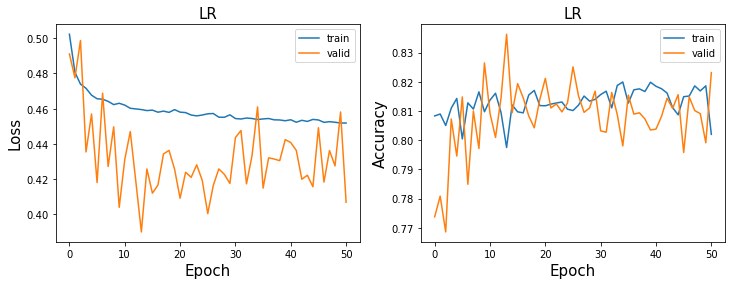

In [8]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [26]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH53_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
0          8


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGnone0_EPOCH8_REDUCEsum.pt


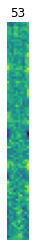

train loss:0.4744105041027069 accuracy:0.796457765667575
0.5


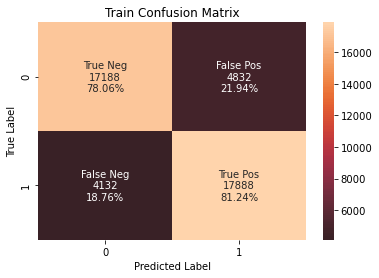

validation loss:0.3987734615802765 accuracy:0.8312688821752265
0.82613295


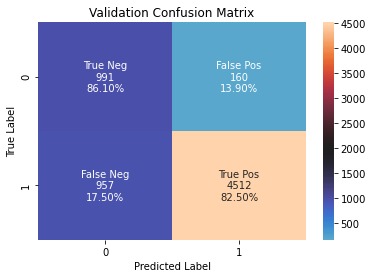

test loss:0.47604283690452576 accuracy:0.7665471144440822
0.74029994


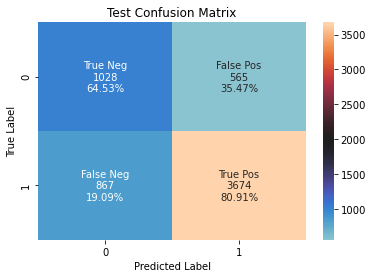

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


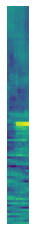

In [27]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### Logistic regression with L2 regularization

In [34]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'



Train loss for epoch 0: 0.49897047877311707
Val loss for epoch 0: 0.5355620384216309
Train loss for epoch 1: 0.4807090163230896
Val loss for epoch 1: 0.48273971676826477
1
Train loss for epoch 2: 0.4740085303783417
Val loss for epoch 2: 0.44188156723976135
2
Train loss for epoch 3: 0.470039039850235
Val loss for epoch 3: 0.45284539461135864
Train loss for epoch 4: 0.4671086370944977
Val loss for epoch 4: 0.4383518099784851
4
Train loss for epoch 5: 0.46573925018310547
Val loss for epoch 5: 0.40703216195106506
5
Train loss for epoch 6: 0.4656553864479065
Val loss for epoch 6: 0.41635429859161377
Train loss for epoch 7: 0.4629807472229004
Val loss for epoch 7: 0.42833849787712097
Train loss for epoch 8: 0.46259117126464844
Val loss for epoch 8: 0.4570474922657013
Train loss for epoch 9: 0.4613521993160248
Val loss for epoch 9: 0.4496322572231293
Train loss for epoch 10: 0.46130913496017456
Val loss for epoch 10: 0.4322059154510498
Train loss for epoch 11: 0.4610721468925476
Val loss for 

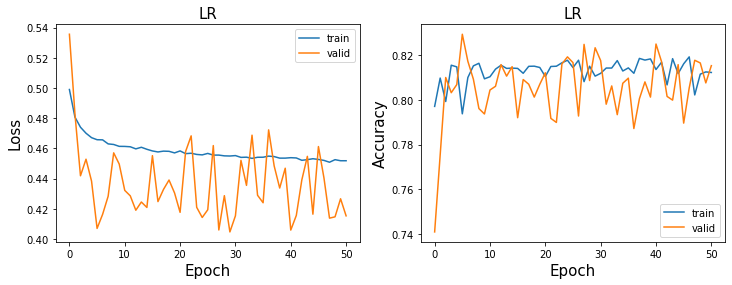

Train loss for epoch 0: 0.5040946006774902
Val loss for epoch 0: 0.5028626918792725
Train loss for epoch 1: 0.48237788677215576
Val loss for epoch 1: 0.4765566289424896
1
Train loss for epoch 2: 0.47683024406433105
Val loss for epoch 2: 0.4819241762161255
Train loss for epoch 3: 0.473862886428833
Val loss for epoch 3: 0.48598623275756836
Train loss for epoch 4: 0.4716995656490326
Val loss for epoch 4: 0.4320169687271118
4
Train loss for epoch 5: 0.46969687938690186
Val loss for epoch 5: 0.45668482780456543
Train loss for epoch 6: 0.4674414396286011
Val loss for epoch 6: 0.46057218313217163
Train loss for epoch 7: 0.4675270915031433
Val loss for epoch 7: 0.46666690707206726
Train loss for epoch 8: 0.46647170186042786
Val loss for epoch 8: 0.45064255595207214
Train loss for epoch 9: 0.466501384973526
Val loss for epoch 9: 0.4295351207256317
9
Train loss for epoch 10: 0.4672131836414337
Val loss for epoch 10: 0.43735870718955994
Train loss for epoch 11: 0.4665182828903198
Val loss for epo

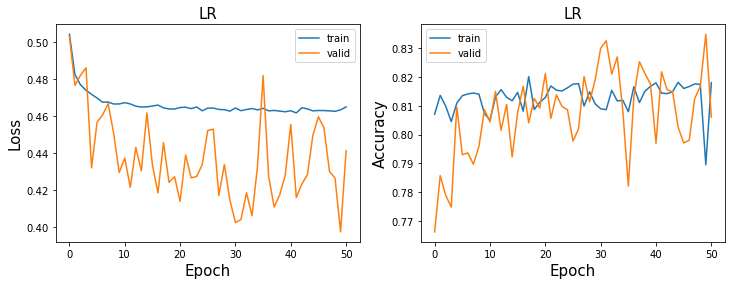

Train loss for epoch 0: 0.562694251537323
Val loss for epoch 0: 0.5179146528244019
Train loss for epoch 1: 0.5317014455795288
Val loss for epoch 1: 0.5334879159927368
Train loss for epoch 2: 0.5288532376289368
Val loss for epoch 2: 0.509978711605072
2
Train loss for epoch 3: 0.5280359387397766
Val loss for epoch 3: 0.4930829107761383
3
Train loss for epoch 4: 0.5253992080688477
Val loss for epoch 4: 0.4906236529350281
4
Train loss for epoch 5: 0.5266770124435425
Val loss for epoch 5: 0.5043965578079224
Train loss for epoch 6: 0.5253565907478333
Val loss for epoch 6: 0.45813968777656555
6
Train loss for epoch 7: 0.5256373286247253
Val loss for epoch 7: 0.4588409662246704
Train loss for epoch 8: 0.5259455442428589
Val loss for epoch 8: 0.47839468717575073
Train loss for epoch 9: 0.526603102684021
Val loss for epoch 9: 0.46475374698638916
Train loss for epoch 10: 0.5252320170402527
Val loss for epoch 10: 0.49517521262168884
Train loss for epoch 11: 0.5243126153945923
Val loss for epoch 11

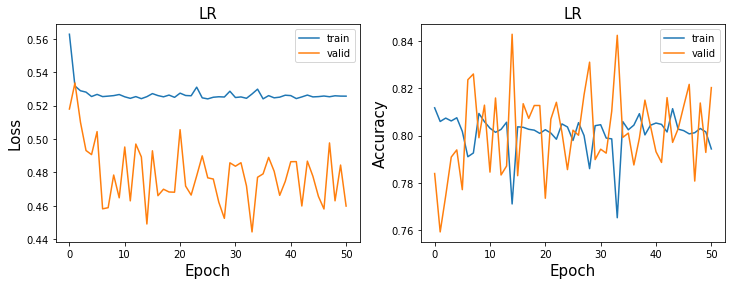

Train loss for epoch 0: 0.5928837656974792
Val loss for epoch 0: 0.5502926707267761
Train loss for epoch 1: 0.561094343662262
Val loss for epoch 1: 0.5286808013916016
1
Train loss for epoch 2: 0.5604376792907715
Val loss for epoch 2: 0.5366358160972595
Train loss for epoch 3: 0.556961178779602
Val loss for epoch 3: 0.529023289680481
Train loss for epoch 4: 0.557937741279602
Val loss for epoch 4: 0.5168185234069824
4
Train loss for epoch 5: 0.5566501021385193
Val loss for epoch 5: 0.5020801424980164
5
Train loss for epoch 6: 0.5557344555854797
Val loss for epoch 6: 0.4969407618045807
6
Train loss for epoch 7: 0.5563691854476929
Val loss for epoch 7: 0.5049000382423401
Train loss for epoch 8: 0.556274950504303
Val loss for epoch 8: 0.4965711236000061
8
Train loss for epoch 9: 0.5556725263595581
Val loss for epoch 9: 0.49353039264678955
9
Train loss for epoch 10: 0.5574457049369812
Val loss for epoch 10: 0.4903101325035095
10
Train loss for epoch 11: 0.5578092336654663
Val loss for epoch 

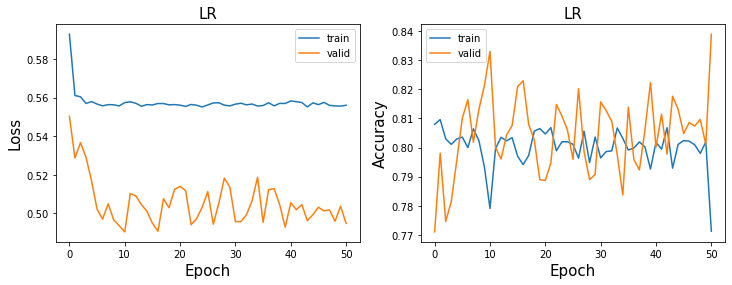

In [12]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [35]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH53_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         49
50        33
100       10


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGl21_EPOCH49_REDUCEsum.pt


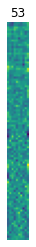

train loss:0.4885401427745819 accuracy:0.7759309718437783
0.5


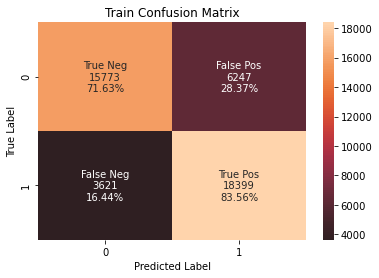

validation loss:0.39748552441596985 accuracy:0.8347432024169185
0.82613295


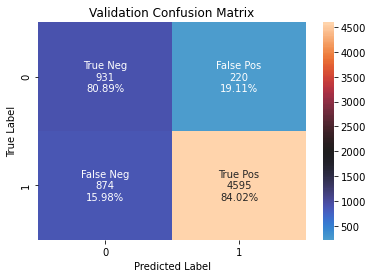

test loss:0.4904194474220276 accuracy:0.7502445386371046
0.74029994


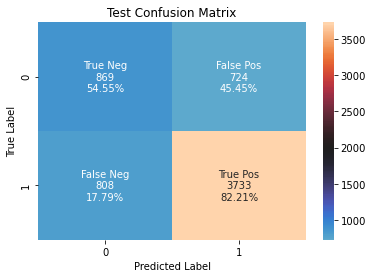

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


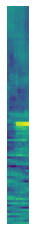

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGl250_EPOCH33_REDUCEsum.pt


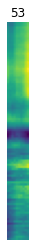

train loss:0.5428156852722168 accuracy:0.7631925522252497
0.5


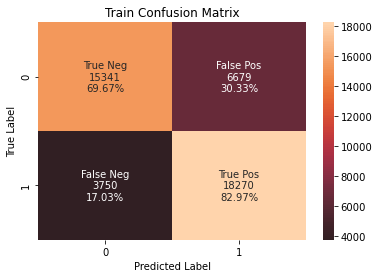

validation loss:0.4443303346633911 accuracy:0.8422960725075529
0.82613295


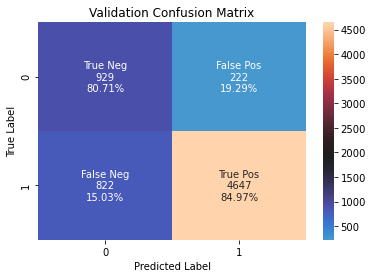

test loss:0.5089895129203796 accuracy:0.7619823932181284
0.74029994


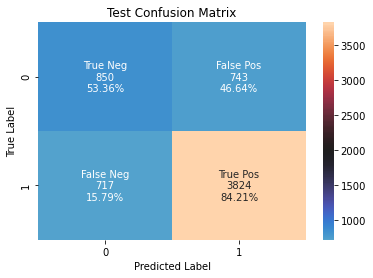

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


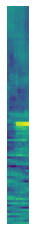

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGl2100_EPOCH10_REDUCEsum.pt


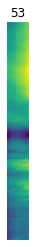

train loss:0.5698262453079224 accuracy:0.7753405994550409
0.5


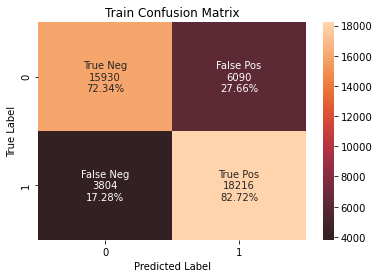

validation loss:0.4903101325035095 accuracy:0.8330815709969789
0.82613295


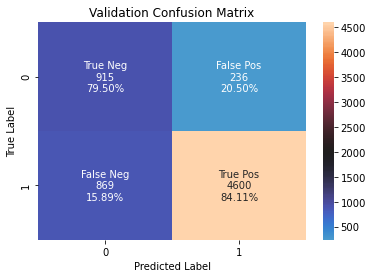

test loss:0.5452005863189697 accuracy:0.7546462341049885
0.74029994


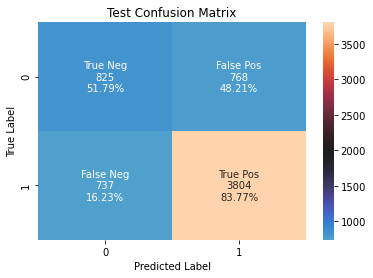

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


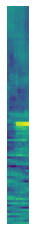

In [36]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### Logistic Regression with finite difference regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 10



Train loss for epoch 0: 0.502798318862915
Val loss for epoch 0: 0.5290687084197998
Train loss for epoch 1: 0.4824625551700592
Val loss for epoch 1: 0.46294137835502625
1
Train loss for epoch 2: 0.47464755177497864
Val loss for epoch 2: 0.4638963043689728
Train loss for epoch 3: 0.4711306095123291
Val loss for epoch 3: 0.4570554494857788
3
Train loss for epoch 4: 0.46797317266464233
Val loss for epoch 4: 0.4479367434978485
4
Train loss for epoch 5: 0.46543750166893005
Val loss for epoch 5: 0.42620790004730225
5
Train loss for epoch 6: 0.46582669019699097
Val loss for epoch 6: 0.42142006754875183
6
Train loss for epoch 7: 0.463733434677124
Val loss for epoch 7: 0.4101405441761017
7
Train loss for epoch 8: 0.4646589159965515
Val loss for epoch 8: 0.4297952651977539
Train loss for epoch 9: 0.46149641275405884
Val loss for epoch 9: 0.4244292378425598
Train loss for epoch 10: 0.46074360609054565
Val loss for epoch 10: 0.4611738324165344
Train loss for epoch 11: 0.4596174955368042
Val loss fo

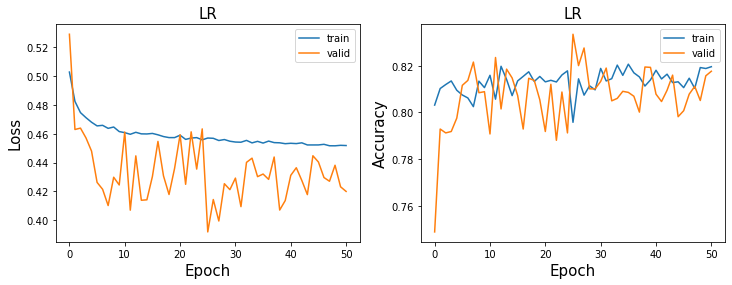

Train loss for epoch 0: 0.5059268474578857
Val loss for epoch 0: 0.502902090549469
Train loss for epoch 1: 0.4872267246246338
Val loss for epoch 1: 0.4852146804332733
1
Train loss for epoch 2: 0.4793989956378937
Val loss for epoch 2: 0.4715864062309265
2
Train loss for epoch 3: 0.4753389060497284
Val loss for epoch 3: 0.44802358746528625
3
Train loss for epoch 4: 0.4724952280521393
Val loss for epoch 4: 0.44724878668785095
4
Train loss for epoch 5: 0.4719775915145874
Val loss for epoch 5: 0.4405796527862549
5
Train loss for epoch 6: 0.4702095091342926
Val loss for epoch 6: 0.4380359947681427
6
Train loss for epoch 7: 0.46947482228279114
Val loss for epoch 7: 0.49237239360809326
Train loss for epoch 8: 0.4700985550880432
Val loss for epoch 8: 0.4395065903663635
Train loss for epoch 9: 0.46917247772216797
Val loss for epoch 9: 0.4169360399246216
9
Train loss for epoch 10: 0.4695081412792206
Val loss for epoch 10: 0.41135215759277344
10
Train loss for epoch 11: 0.469463586807251
Val loss 

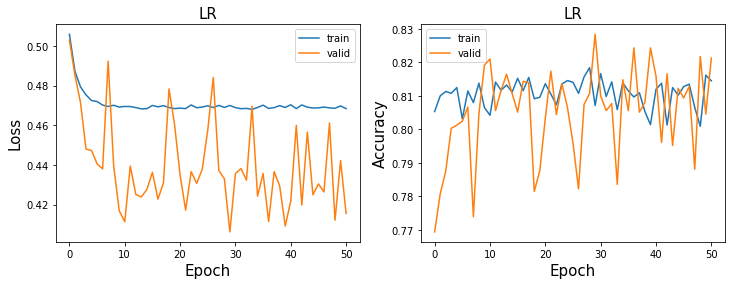

Train loss for epoch 0: 0.560508131980896
Val loss for epoch 0: 0.4866304397583008
Train loss for epoch 1: 0.5085353851318359
Val loss for epoch 1: 0.5180854797363281
Train loss for epoch 2: 0.5052292943000793
Val loss for epoch 2: 0.4759892225265503
2
Train loss for epoch 3: 0.5025731325149536
Val loss for epoch 3: 0.46995338797569275
3
Train loss for epoch 4: 0.5027374625205994
Val loss for epoch 4: 0.47375497221946716
Train loss for epoch 5: 0.5011698603630066
Val loss for epoch 5: 0.5053292512893677
Train loss for epoch 6: 0.5026535987854004
Val loss for epoch 6: 0.45728418231010437
6
Train loss for epoch 7: 0.501997709274292
Val loss for epoch 7: 0.4955940246582031
Train loss for epoch 8: 0.5005516409873962
Val loss for epoch 8: 0.455201655626297
8
Train loss for epoch 9: 0.5009428858757019
Val loss for epoch 9: 0.4450000524520874
9
Train loss for epoch 10: 0.5025439858436584
Val loss for epoch 10: 0.4596012830734253
Train loss for epoch 11: 0.5003736615180969
Val loss for epoch 1

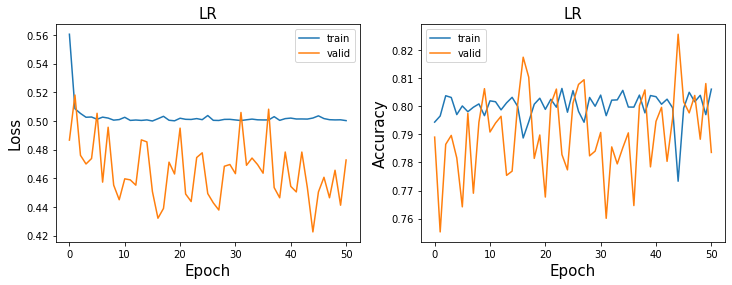

Train loss for epoch 0: 0.6000755429267883
Val loss for epoch 0: 0.5380891561508179
Train loss for epoch 1: 0.5168769359588623
Val loss for epoch 1: 0.5277535319328308
1
Train loss for epoch 2: 0.5153508186340332
Val loss for epoch 2: 0.4984697997570038
2
Train loss for epoch 3: 0.5118650794029236
Val loss for epoch 3: 0.5067365765571594
Train loss for epoch 4: 0.5115813612937927
Val loss for epoch 4: 0.4766002595424652
4
Train loss for epoch 5: 0.5107918977737427
Val loss for epoch 5: 0.47342944145202637
5
Train loss for epoch 6: 0.5099610090255737
Val loss for epoch 6: 0.4693659245967865
6
Train loss for epoch 7: 0.5104514360427856
Val loss for epoch 7: 0.4839710295200348
Train loss for epoch 8: 0.5107517242431641
Val loss for epoch 8: 0.45518648624420166
8
Train loss for epoch 9: 0.5111953616142273
Val loss for epoch 9: 0.4646565318107605
Train loss for epoch 10: 0.5118827223777771
Val loss for epoch 10: 0.4873177707195282
Train loss for epoch 11: 0.5107539296150208
Val loss for epo

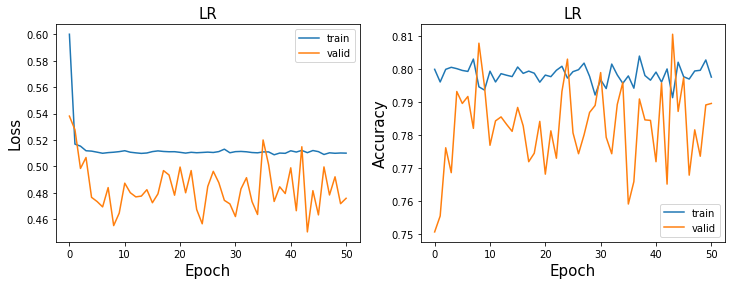

In [16]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [32]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH53_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         29
50        44
100       43


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGfinite_diff1_EPOCH29_REDUCEsum.pt


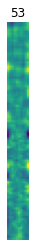

train loss:0.4802103638648987 accuracy:0.7937556766575841
0.5


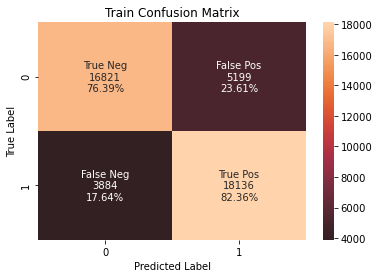

validation loss:0.4062193036079407 accuracy:0.8283987915407856
0.82613295


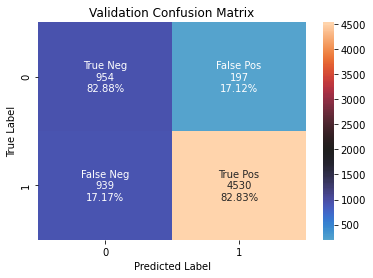

test loss:0.48356521129608154 accuracy:0.7566025432018259
0.74029994


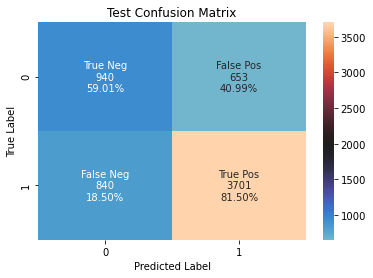

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


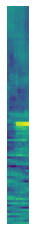

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGfinite_diff50_EPOCH44_REDUCEsum.pt


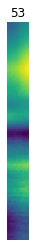

train loss:0.5149444341659546 accuracy:0.7703224341507721
0.5


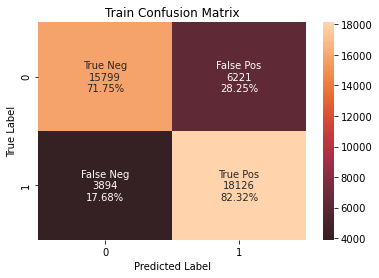

validation loss:0.4225374758243561 accuracy:0.8255287009063444
0.82613295


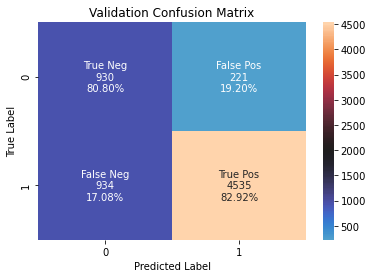

test loss:0.4955105185508728 accuracy:0.7489403325725464
0.74029994


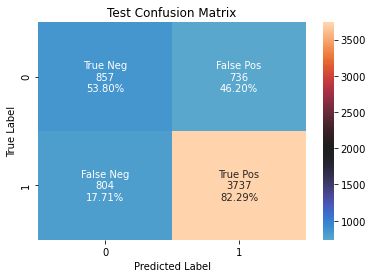

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


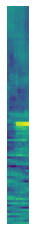

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH53_LOSSbce_REGfinite_diff100_EPOCH43_REDUCEsum.pt


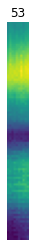

train loss:0.5209760665893555 accuracy:0.7845367847411444
0.5


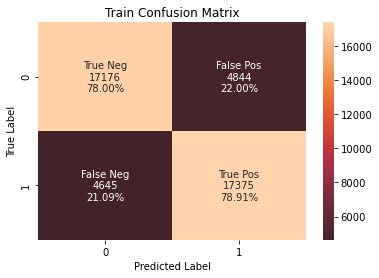

validation loss:0.45040908455848694 accuracy:0.8105740181268882
0.82613295


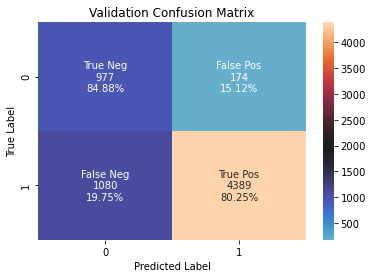

test loss:0.5126066207885742 accuracy:0.7453537658950115
0.74029994


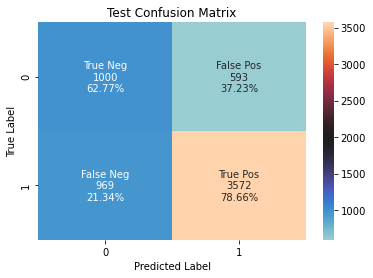

date:180412, rec:002, time:5594.0, label:1.0
Original data 62 CH


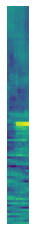

In [33]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

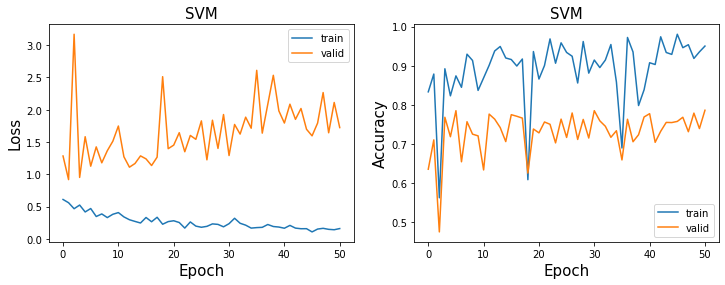

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

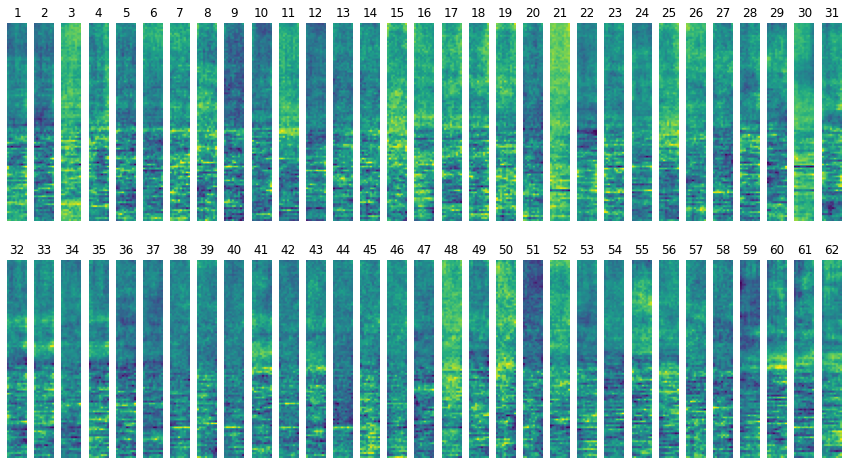

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


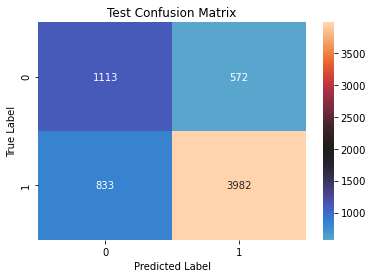

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


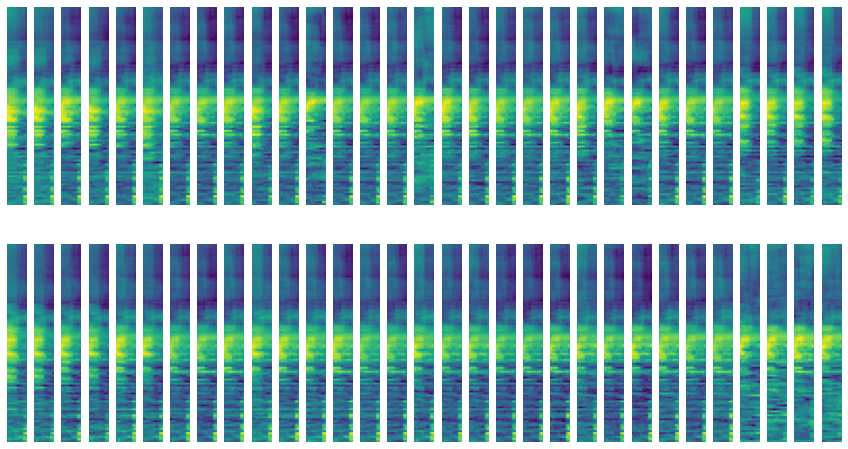

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

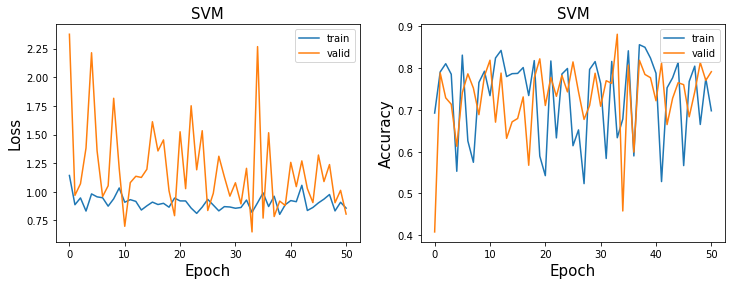

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

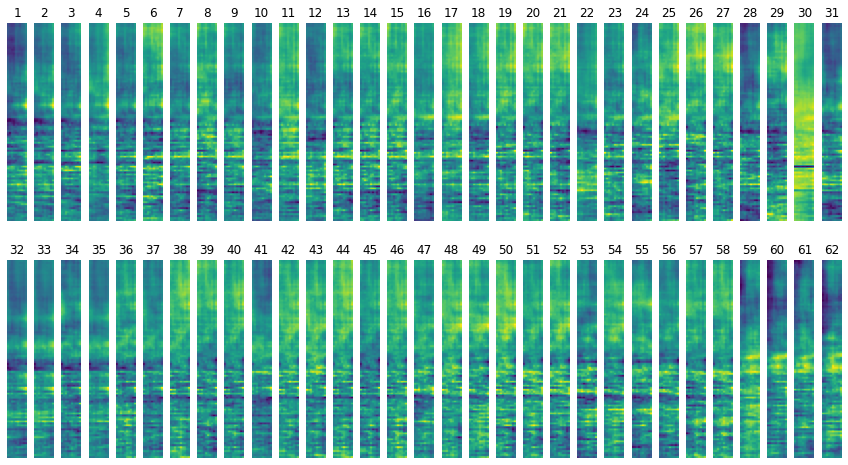

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


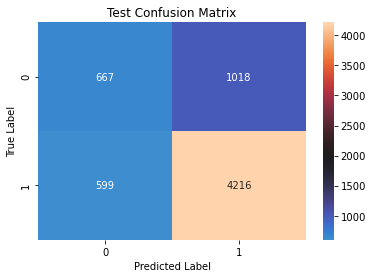

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


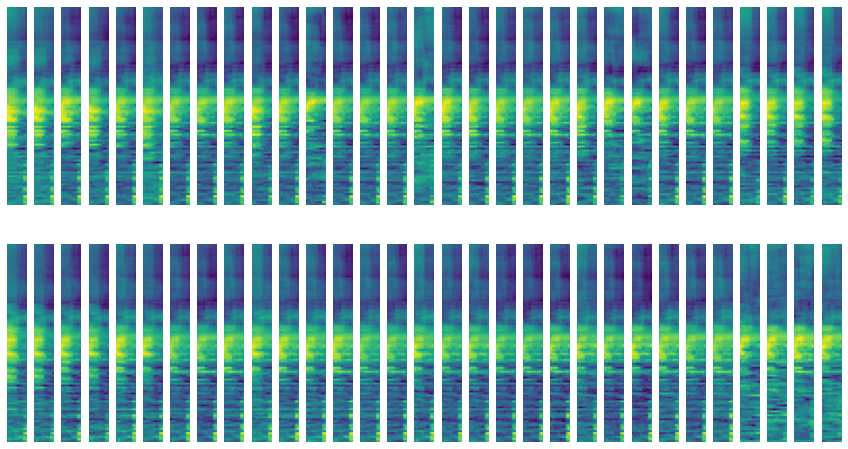

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

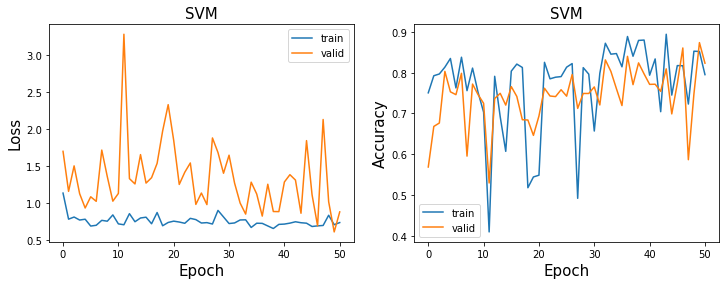

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

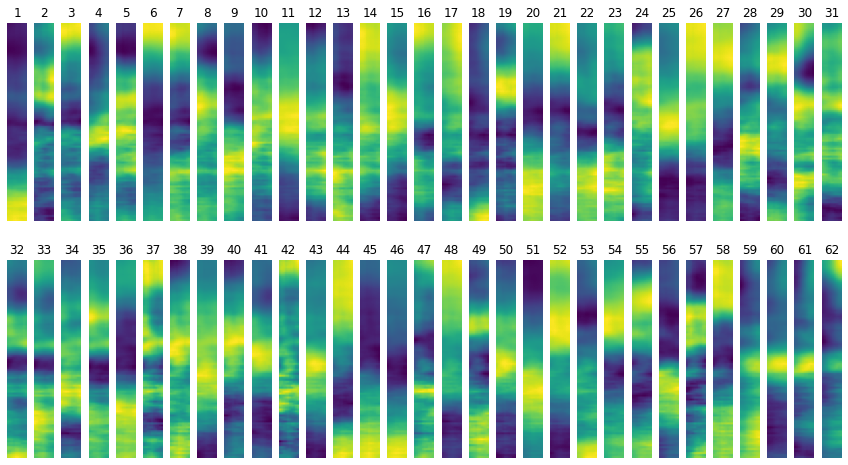

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


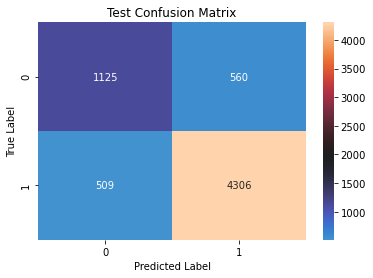

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


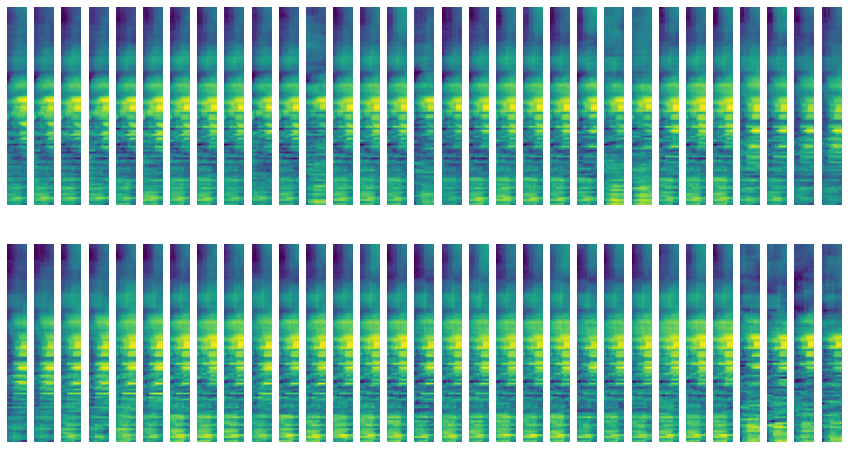

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()